# Explore here

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

df= pd.read_csv(r"https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv").iloc[:,1:]
pd.set_option('display.max_columns', None)
df

name   host_id  \
0                     Clean & quiet apt home by the park      2787   
1                                  Skylit Midtown Castle      2845   
2                    THE VILLAGE OF HARLEM....NEW YORK !      4632   
3                        Cozy Entire Floor of Brownstone      4869   
4       Entire Apt: Spacious Studio/Loft by central park      7192   
...                                                  ...       ...   
48890    Charming one bedroom - newly renovated rowhouse   8232441   
48891      Affordable room in Bushwick/East Williamsburg   6570630   
48892            Sunny Studio at Historical Neighborhood  23492952   
48893               43rd St. Time Square-cozy single bed  30985759   
48894  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
1           Jennifer           Manhattan             Midtown  40.75362   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
...              ...                 ...                 ...       ...   
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.97237     Private room    149               1                  9   
1      -73.98377  Entire home/apt    225               1                 45   
2      -73.94190     Private room    150               3                  0   
3      -73.95976  Entire home/apt     89               1                270   
4      -73.94399  Entire home/apt     80              10                  9   
...          ...              ...    ...             ...                ...   
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2018-10-19               0.21                               6   
1      2019-05-21               0.38                               2   
2             NaN                NaN                               1   
3      2019-07-05               4.64                               1   
4      2018-11-19               0.10                               1   
...           ...                ...                             ...   
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
0                   365  
1                   355  
2                   365  
3                   194  
4                     0  
...                 ...  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23  

[48895 rows x 15 columns]

In [96]:
df.shape

(48895, 15)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month               

In [98]:
df.nunique()

name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [99]:
df.drop(['room_type', 'calculated_host_listings_count'], axis=1, inplace=True)

In [100]:
df.duplicated().sum()

0

In [101]:
df.describe().T

count          mean           std         min  \
host_id            48895.0  6.762001e+07  7.861097e+07  2438.00000   
latitude           48895.0  4.072895e+01  5.453008e-02    40.49979   
longitude          48895.0 -7.395217e+01  4.615674e-02   -74.24442   
price              48895.0  1.527207e+02  2.401542e+02     0.00000   
minimum_nights     48895.0  7.029962e+00  2.051055e+01     1.00000   
number_of_reviews  48895.0  2.327447e+01  4.455058e+01     0.00000   
reviews_per_month  38843.0  1.373221e+00  1.680442e+00     0.01000   
availability_365   48895.0  1.127813e+02  1.316223e+02     0.00000   

                            25%           50%           75%           max  
host_id            7.822033e+06  3.079382e+07  1.074344e+08  2.743213e+08  
latitude           4.069010e+01  4.072307e+01  4.076311e+01  4.091306e+01  
longitude         -7.398307e+01 -7.395568e+01 -7.393627e+01 -7.371299e+01  
price              6.900000e+01  1.060000e+02  1.750000e+02  1.000000e+04  
minimum_nights     1.000000e+00  3.000000e+00  5.000000e+00  1.250000e+03  
number_of_reviews  1.000000e+00  5.000000e+00  2.400000e+01  6.290000e+02  
reviews_per_month  1.900000e-01  7.200000e-01  2.020000e+00  5.850000e+01  
availability_365   0.000000e+00  4.500000e+01  2.270000e+02  3.650000e+02

In [102]:
df1 = df[['neighbourhood_group', 'price']]
df1

neighbourhood_group  price
0                Brooklyn    149
1               Manhattan    225
2               Manhattan    150
3                Brooklyn     89
4               Manhattan     80
...                   ...    ...
48890            Brooklyn     70
48891            Brooklyn     40
48892           Manhattan    115
48893           Manhattan     55
48894           Manhattan     90

[48895 rows x 2 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


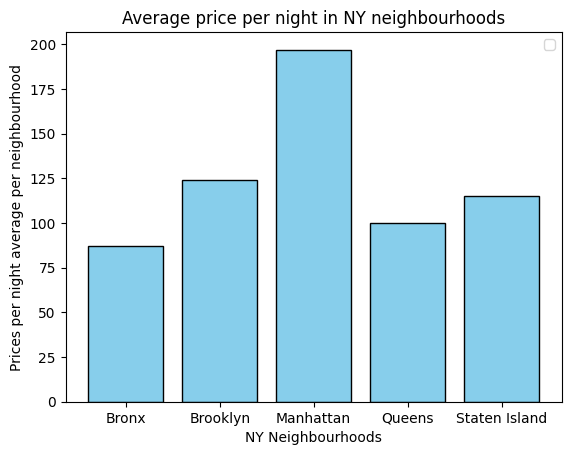

In [103]:
#Medias de los precios por noche de cada vecindario
import matplotlib.pyplot as plt

price_bronx = df1.loc[df['neighbourhood_group']== 'Bronx', 'price'].mean().round()
price_brooklyn = df1.loc[df['neighbourhood_group']== 'Brooklyn', 'price'].mean().round()
price_manhattan = df1.loc[df['neighbourhood_group']== 'Manhattan', 'price'].mean().round()
price_queens = df1.loc[df['neighbourhood_group']== 'Queens', 'price'].mean().round()
price_statenisland = df1.loc[df['neighbourhood_group']== 'Staten Island', 'price'].mean().round()

#Valores adicionales a mostrar en el plot
x = [0,1,2,3,4]
xlabels = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
xvalues = [price_bronx, price_brooklyn, price_manhattan, price_queens, price_statenisland]
plt_lenght = np.arange(len(x))

plt.bar(plt_lenght, xvalues, color='skyblue', edgecolor='black', align='center')
plt.xlabel('NY Neighbourhoods')
plt.ylabel('Prices per night average per neighbourhood')
plt.title('Average price per night in NY neighbourhoods')
plt.xticks(x, xlabels)
plt.legend()
plt.show()


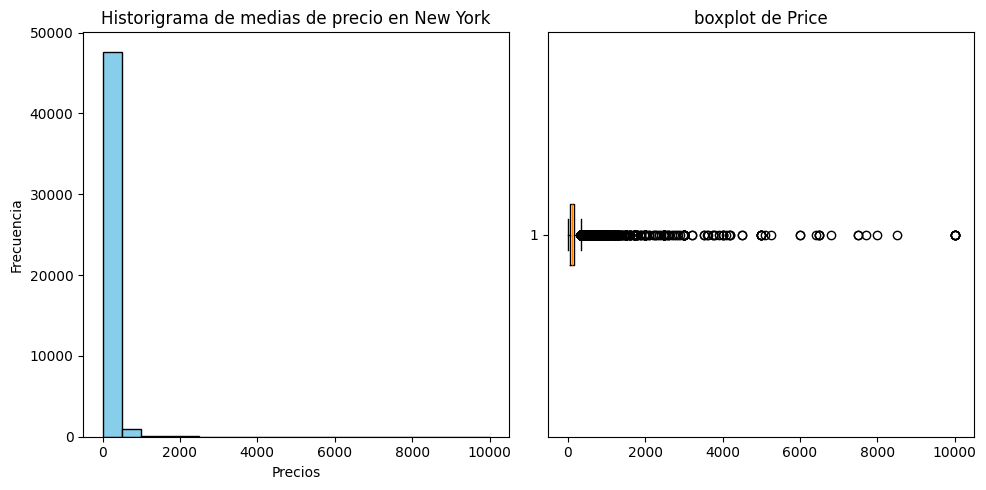

In [104]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].hist(df['price'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Historigrama de medias de precio en New York')
ax[0].set_xlabel('Precios')
ax[0].set_ylabel('Frecuencia')

ax[1].boxplot(df['price'], vert=False)
ax[1].set_title('boxplot de Price')
ax[1].set_label('Precio')

plt.tight_layout()
plt.show()

In [105]:
df['log_price'] = np.log(df.price+0.1)
df

name   host_id  \
0                     Clean & quiet apt home by the park      2787   
1                                  Skylit Midtown Castle      2845   
2                    THE VILLAGE OF HARLEM....NEW YORK !      4632   
3                        Cozy Entire Floor of Brownstone      4869   
4       Entire Apt: Spacious Studio/Loft by central park      7192   
...                                                  ...       ...   
48890    Charming one bedroom - newly renovated rowhouse   8232441   
48891      Affordable room in Bushwick/East Williamsburg   6570630   
48892            Sunny Studio at Historical Neighborhood  23492952   
48893               43rd St. Time Square-cozy single bed  30985759   
48894  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
1           Jennifer           Manhattan             Midtown  40.75362   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
...              ...                 ...                 ...       ...   
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude  price  minimum_nights  number_of_reviews last_review  \
0      -73.97237    149               1                  9  2018-10-19   
1      -73.98377    225               1                 45  2019-05-21   
2      -73.94190    150               3                  0         NaN   
3      -73.95976     89               1                270  2019-07-05   
4      -73.94399     80              10                  9  2018-11-19   
...          ...    ...             ...                ...         ...   
48890  -73.94995     70               2                  0         NaN   
48891  -73.93317     40               4                  0         NaN   
48892  -73.94867    115              10                  0         NaN   
48893  -73.99112     55               1                  0         NaN   
48894  -73.98933     90               7                  0         NaN   

       reviews_per_month  availability_365  log_price  
0                   0.21               365   5.004617  
1                   0.38               355   5.416545  
2                    NaN               365   5.011302  
3                   4.64               194   4.489759  
4                   0.10                 0   4.383276  
...                  ...               ...        ...  
48890                NaN                 9   4.249923  
48891                NaN                36   3.691376  
48892                NaN                27   4.745801  
48893                NaN                 2   4.009150  
48894                NaN                23   4.500920  

[48895 rows x 14 columns]

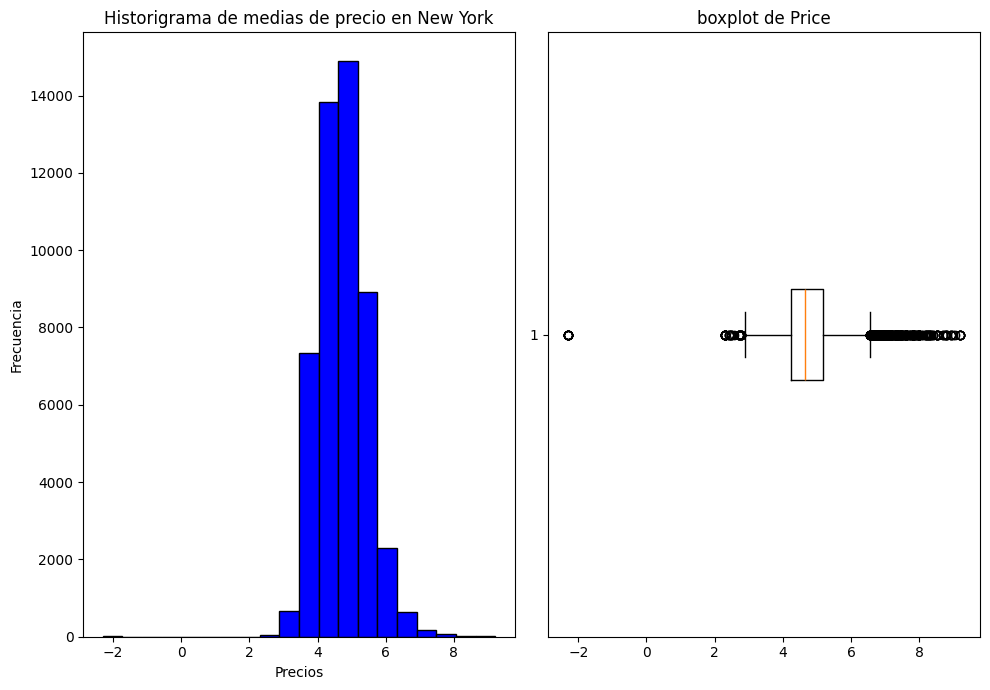

In [106]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(10,7))

ax[0].hist(df['log_price'], bins=20, color='blue', edgecolor='black')
ax[0].set_title('Historigrama de medias de precio en New York')
ax[0].set_xlabel('Precios')
ax[0].set_ylabel('Frecuencia')

ax[1].boxplot(df['log_price'], vert=False)
ax[1].set_title('boxplot de Price')
ax[1].set_label('Precio')

plt.tight_layout()
plt.show()

In [107]:
df.isnull().mean()*100
#Que porcentaje de casillas tiene Nan datos

name                    0.032723
host_id                 0.000000
host_name               0.042949
neighbourhood_group     0.000000
neighbourhood           0.000000
latitude                0.000000
longitude               0.000000
price                   0.000000
minimum_nights          0.000000
number_of_reviews       0.000000
last_review            20.558339
reviews_per_month      20.558339
availability_365        0.000000
log_price               0.000000
dtype: float64

In [108]:
df.drop(['last_review', 'reviews_per_month'], axis=1, inplace=True) 
#Elimino las variables que mas Nans tienen, para limpiar m+as los datos

In [109]:
df.isnull().any(axis=1).sum()/len(df)*100
#Ahora obtengo un porcentaje general de Nans de todo el data set, al eliminar las variables com mayor participacion, mis datos son mas confiables

0.07567235913692606

<Axes: >

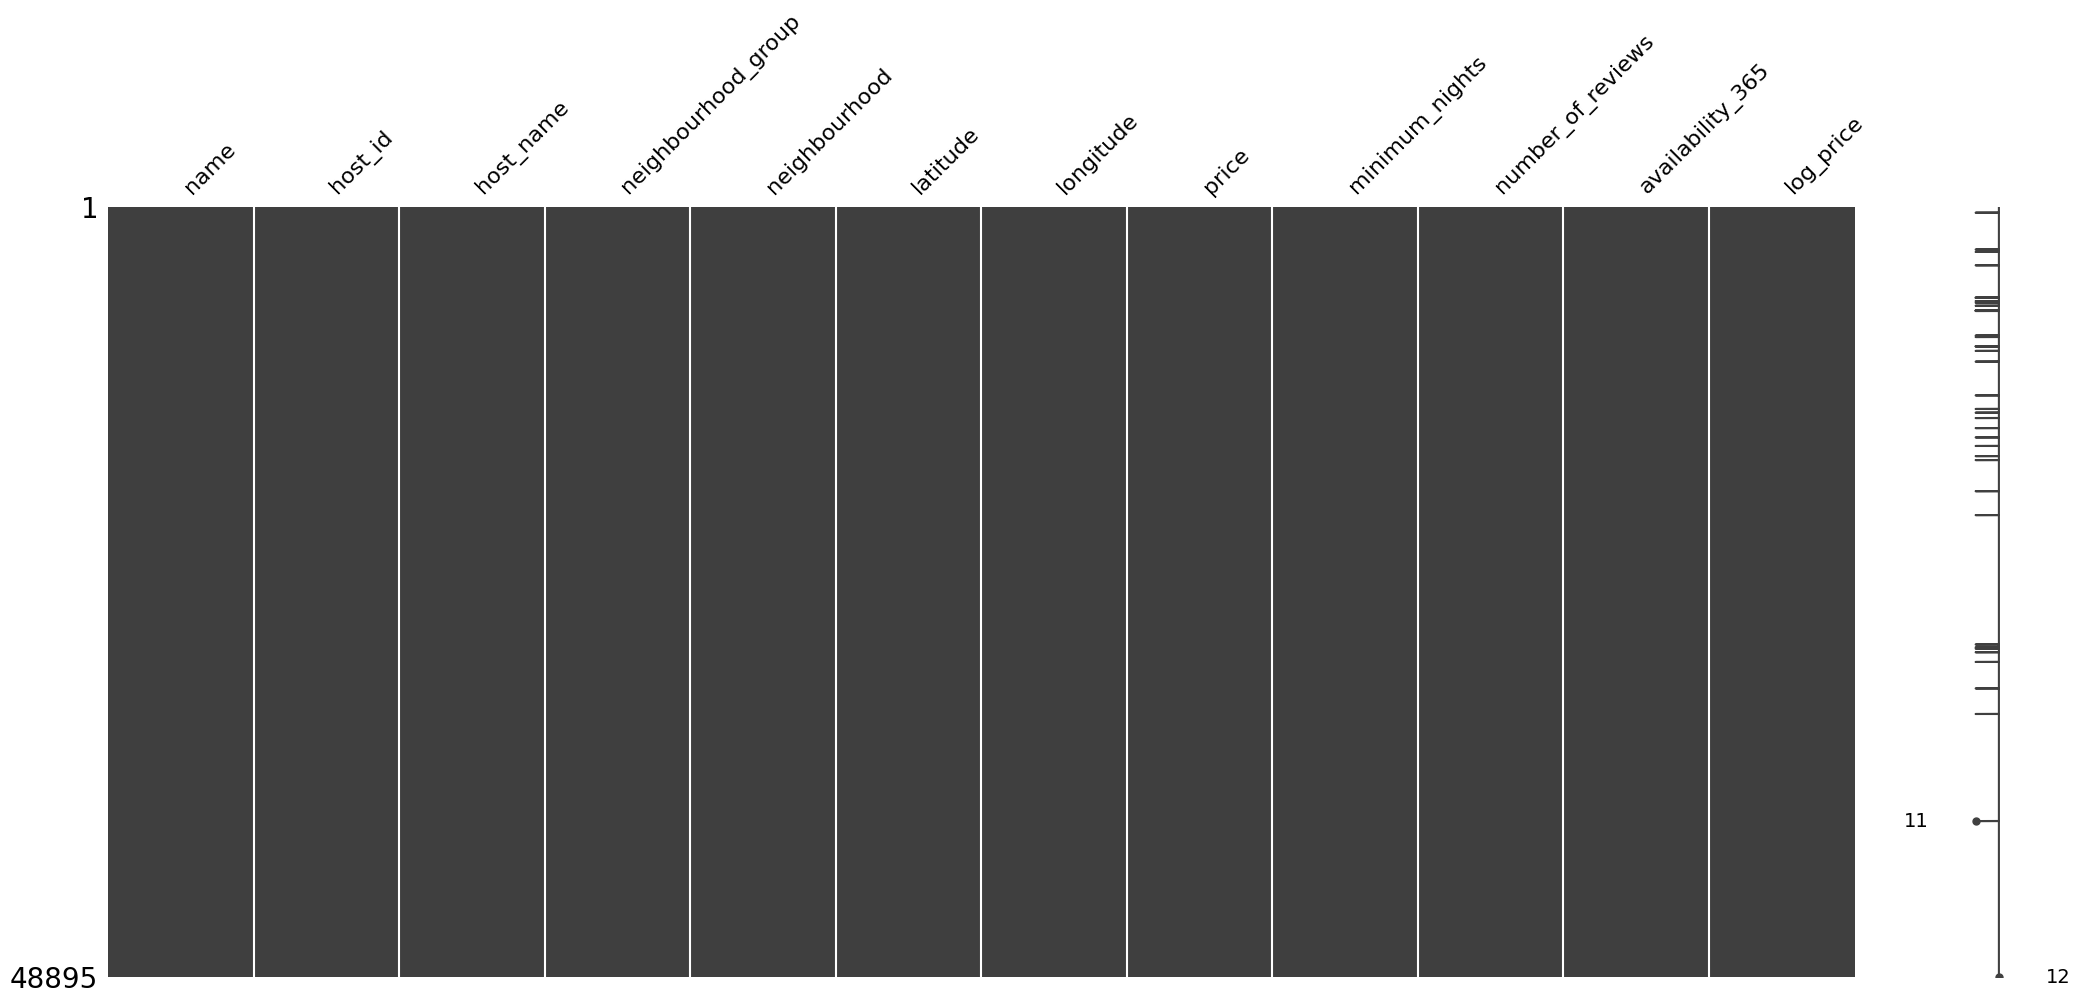

In [110]:
import missingno as msno

msno.matrix(df)
#Me muestra en que nive hay datos faltantes

In [111]:
df.isna().sum()
#ahora me muestra exactamente que variables tienen datos Nan

name                   16
host_id                 0
host_name              21
neighbourhood_group     0
neighbourhood           0
latitude                0
longitude               0
price                   0
minimum_nights          0
number_of_reviews       0
availability_365        0
log_price               0
dtype: int64

In [112]:
df.drop(['name', 'host_name'], inplace=True, axis=1)
df
#Solo con el host id puedo trackear cuentas individuales

host_id neighbourhood_group       neighbourhood  latitude  longitude  \
0          2787            Brooklyn          Kensington  40.64749  -73.97237   
1          2845           Manhattan             Midtown  40.75362  -73.98377   
2          4632           Manhattan              Harlem  40.80902  -73.94190   
3          4869            Brooklyn        Clinton Hill  40.68514  -73.95976   
4          7192           Manhattan         East Harlem  40.79851  -73.94399   
...         ...                 ...                 ...       ...        ...   
48890   8232441            Brooklyn  Bedford-Stuyvesant  40.67853  -73.94995   
48891   6570630            Brooklyn            Bushwick  40.70184  -73.93317   
48892  23492952           Manhattan              Harlem  40.81475  -73.94867   
48893  30985759           Manhattan      Hell's Kitchen  40.75751  -73.99112   
48894  68119814           Manhattan      Hell's Kitchen  40.76404  -73.98933   

       price  minimum_nights  number_of_reviews  availability_365  log_price  
0        149               1                  9               365   5.004617  
1        225               1                 45               355   5.416545  
2        150               3                  0               365   5.011302  
3         89               1                270               194   4.489759  
4         80              10                  9                 0   4.383276  
...      ...             ...                ...               ...        ...  
48890     70               2                  0                 9   4.249923  
48891     40               4                  0                36   3.691376  
48892    115              10                  0                27   4.745801  
48893     55               1                  0                 2   4.009150  
48894     90               7                  0                23   4.500920  

[48895 rows x 10 columns]

In [113]:
host_population = df[["host_id"]].groupby("host_id").value_counts()
host_population

#Esto me especifica que hay algunos anuncios de este Dataframe pertenecen al mismo anfitrion y cuantos.

host_id
2438         1
2571         1
2787         6
2845         2
2868         1
            ..
274273284    1
274298453    1
274307600    1
274311461    1
274321313    1
Name: count, Length: 37457, dtype: int64

In [114]:
#Asi sabemos que esta dataframe en realidad nos habla de la actividad de 37547 anfitriones

In [115]:
#Quiero quedarme unicamente con los Host que tienen mas de dos anuncios publicados
duplicated_rows= df[df['host_id'].duplicated()==True]
duplicated_rows.reset_index(drop=True, inplace=True)
duplicated_rows

host_id neighbourhood_group       neighbourhood  latitude  longitude  \
0          22486            Brooklyn          Park Slope  40.67989  -73.97798   
1          22486            Brooklyn          Park Slope  40.68001  -73.97865   
2          32294           Manhattan              Harlem  40.82130  -73.95318   
3           9744            Brooklyn         South Slope  40.66869  -73.98780   
4           7549           Manhattan     Lower East Side  40.71401  -73.98917   
...          ...                 ...                 ...       ...        ...   
11433  208514239            Brooklyn        Williamsburg  40.71232  -73.94220   
11434  107716952              Queens             Jamaica  40.69137  -73.80844   
11435    8232441            Brooklyn  Bedford-Stuyvesant  40.67853  -73.94995   
11436    6570630            Brooklyn            Bushwick  40.70184  -73.93317   
11437   30985759           Manhattan      Hell's Kitchen  40.75751  -73.99112   

       price  minimum_nights  number_of_reviews  availability_365  log_price  
0         80               1                 39               364   4.383276  
1        110               2                 71               304   4.701389  
2         50               3                273               359   3.914021  
3         89               4                168               340   4.489759  
4         40               1                214               188   3.691376  
...      ...             ...                ...               ...        ...  
11433    170               1                  0               365   5.136386  
11434     65               1                  0               163   4.175925  
11435     70               2                  0                 9   4.249923  
11436     40               4                  0                36   3.691376  
11437     55               1                  0                 2   4.009150  

[11438 rows x 10 columns]

In [116]:
#Quiero saber quien es el host con mas anuncios en cada una de las cinco zonas de ny y cuantos tiene

count = duplicated_rows[['host_id']].value_counts().nlargest(10)
count #me muestra cuales son los host con mas anuncios, pero necesito filtrar la informacion de acuerdo al barrio tambien     

host_id  
219517861    326
107434423    231
30283594     120
137358866    102
12243051      95
16098958      95
61391963      90
22541573      86
200380610     64
7503643       51
Name: count, dtype: int64

In [117]:
brooklyn_listings = duplicated_rows[duplicated_rows['neighbourhood_group']== 'Brooklyn']
bronx_listings = duplicated_rows[duplicated_rows['neighbourhood_group']== 'Bronx']
manhattan_listings = duplicated_rows[duplicated_rows['neighbourhood_group']== 'Manhattan']
queens_listings = duplicated_rows[duplicated_rows['neighbourhood_group']== 'Queens']
statenisland_listings = duplicated_rows[duplicated_rows['neighbourhood_group']== 'Staten Island']

#Separo y filtro por cada barrio

In [118]:
brooklyn_main_host = brooklyn_listings['host_id'].value_counts().nlargest(1)
print(brooklyn_main_host)
bronx_main_host = bronx_listings['host_id'].value_counts().nlargest(1)
print(bronx_main_host)
manhattan_main_host = manhattan_listings['host_id'].value_counts().nlargest(1)
print(manhattan_main_host)
queens_main_host = queens_listings['host_id'].value_counts().nlargest(1)
print(queens_main_host)
statenisland_main_host = statenisland_listings['host_id'].value_counts().nlargest(1)
print(statenisland_main_host)

#Aqui filtro para saber cual es el id del host con mas anuncios en cada barrio y cuantos tiene

host_id
7503643    51
Name: count, dtype: int64
host_id
310670    12
Name: count, dtype: int64
host_id
219517861    326
Name: count, dtype: int64
host_id
137358866    79
Name: count, dtype: int64
host_id
104812805    7
Name: count, dtype: int64


In [119]:
new_df = duplicated_rows[duplicated_rows['host_id'].isin([7503643, 310670, 219517861, 137358866, 104812805])].copy()
new_df #nuevo dataframe contiene los anuncios del host mas grande de cada zona y todos los anuncios publicados

host_id neighbourhood_group       neighbourhood  latitude  longitude  \
357      7503643            Brooklyn          Greenpoint  40.72756  -73.94230   
365      7503643            Brooklyn          Greenpoint  40.72732  -73.94076   
376      7503643            Brooklyn          Greenpoint  40.72267  -73.94362   
379      7503643            Brooklyn          Greenpoint  40.72686  -73.94177   
390      7503643            Brooklyn          Greenpoint  40.72570  -73.94181   
...          ...                 ...                 ...       ...        ...   
11126  219517861           Manhattan  Financial District  40.70818  -74.00631   
11127  219517861           Manhattan  Financial District  40.70691  -74.00682   
11128  219517861           Manhattan  Financial District  40.70772  -74.00673   
11157  219517861           Manhattan  Financial District  40.70840  -74.00518   
11159  219517861           Manhattan  Financial District  40.70707  -74.00557   

       price  minimum_nights  number_of_reviews  availability_365  log_price  
357      129              30                  6               249   4.860587  
365      129              30                  6               277   4.860587  
376      149              30                  9               343   5.004617  
379      149              30                  7               281   5.004617  
390      129              30                  8               344   4.860587  
...      ...             ...                ...               ...        ...  
11126    135              29                  0               339   4.906015  
11127    165              29                  0               342   5.106551  
11128    165              29                  0               347   5.106551  
11157    699              29                  0               327   6.549794  
11159    699              29                  0               341   6.549794  

[498 rows x 10 columns]

In [120]:
#aqui retomo el duplicated rows, ya que tiene mas informacion y puede hacer el eda mas facil
duplicated_rows.reset_index(drop=True, inplace=True)
dup_df = duplicated_rows.copy()

In [121]:
dup_df

host_id neighbourhood_group       neighbourhood  latitude  longitude  \
0          22486            Brooklyn          Park Slope  40.67989  -73.97798   
1          22486            Brooklyn          Park Slope  40.68001  -73.97865   
2          32294           Manhattan              Harlem  40.82130  -73.95318   
3           9744            Brooklyn         South Slope  40.66869  -73.98780   
4           7549           Manhattan     Lower East Side  40.71401  -73.98917   
...          ...                 ...                 ...       ...        ...   
11433  208514239            Brooklyn        Williamsburg  40.71232  -73.94220   
11434  107716952              Queens             Jamaica  40.69137  -73.80844   
11435    8232441            Brooklyn  Bedford-Stuyvesant  40.67853  -73.94995   
11436    6570630            Brooklyn            Bushwick  40.70184  -73.93317   
11437   30985759           Manhattan      Hell's Kitchen  40.75751  -73.99112   

       price  minimum_nights  number_of_reviews  availability_365  log_price  
0         80               1                 39               364   4.383276  
1        110               2                 71               304   4.701389  
2         50               3                273               359   3.914021  
3         89               4                168               340   4.489759  
4         40               1                214               188   3.691376  
...      ...             ...                ...               ...        ...  
11433    170               1                  0               365   5.136386  
11434     65               1                  0               163   4.175925  
11435     70               2                  0                 9   4.249923  
11436     40               4                  0                36   3.691376  
11437     55               1                  0                 2   4.009150  

[11438 rows x 10 columns]

In [122]:
dup_df.drop(['latitude', 'longitude', 'neighbourhood', 'number_of_reviews'], axis=1, inplace=True)
dup_df

host_id neighbourhood_group  price  minimum_nights  availability_365  \
0          22486            Brooklyn     80               1               364   
1          22486            Brooklyn    110               2               304   
2          32294           Manhattan     50               3               359   
3           9744            Brooklyn     89               4               340   
4           7549           Manhattan     40               1               188   
...          ...                 ...    ...             ...               ...   
11433  208514239            Brooklyn    170               1               365   
11434  107716952              Queens     65               1               163   
11435    8232441            Brooklyn     70               2                 9   
11436    6570630            Brooklyn     40               4                36   
11437   30985759           Manhattan     55               1                 2   

       log_price  
0       4.383276  
1       4.701389  
2       3.914021  
3       4.489759  
4       3.691376  
...          ...  
11433   5.136386  
11434   4.175925  
11435   4.249923  
11436   3.691376  
11437   4.009150  

[11438 rows x 6 columns]

In [123]:
#Ahora quiero agregar una columna que responda 1 si es probable que tenga licencia turistica o 0 si no la tiene. Esto depende del numero minimo de noches ofrecido, aunque no es completamente seguro que el minimo de +28 noches sea solo por eleccion del anfitrion
def get_license(row):
    have_license = row['minimum_nights']
    if have_license < 28:
        return 0
    elif have_license >= 28:
        return 1

dup_df['license'] = dup_df.apply(get_license, axis=1)
dup_df

host_id neighbourhood_group  price  minimum_nights  availability_365  \
0          22486            Brooklyn     80               1               364   
1          22486            Brooklyn    110               2               304   
2          32294           Manhattan     50               3               359   
3           9744            Brooklyn     89               4               340   
4           7549           Manhattan     40               1               188   
...          ...                 ...    ...             ...               ...   
11433  208514239            Brooklyn    170               1               365   
11434  107716952              Queens     65               1               163   
11435    8232441            Brooklyn     70               2                 9   
11436    6570630            Brooklyn     40               4                36   
11437   30985759           Manhattan     55               1                 2   

       log_price  license  
0       4.383276        0  
1       4.701389        0  
2       3.914021        0  
3       4.489759        0  
4       3.691376        0  
...          ...      ...  
11433   5.136386        0  
11434   4.175925        0  
11435   4.249923        0  
11436   3.691376        0  
11437   4.009150        0  

[11438 rows x 7 columns]

In [124]:
#Ahora quiero anadir la columna de precio por estadia minima
dup_df['price_minimum_stay'] = dup_df['price']*dup_df['minimum_nights']
dup_df

host_id neighbourhood_group  price  minimum_nights  availability_365  \
0          22486            Brooklyn     80               1               364   
1          22486            Brooklyn    110               2               304   
2          32294           Manhattan     50               3               359   
3           9744            Brooklyn     89               4               340   
4           7549           Manhattan     40               1               188   
...          ...                 ...    ...             ...               ...   
11433  208514239            Brooklyn    170               1               365   
11434  107716952              Queens     65               1               163   
11435    8232441            Brooklyn     70               2                 9   
11436    6570630            Brooklyn     40               4                36   
11437   30985759           Manhattan     55               1                 2   

       log_price  license  price_minimum_stay  
0       4.383276        0                  80  
1       4.701389        0                 220  
2       3.914021        0                 150  
3       4.489759        0                 356  
4       3.691376        0                  40  
...          ...      ...                 ...  
11433   5.136386        0                 170  
11434   4.175925        0                  65  
11435   4.249923        0                 140  
11436   3.691376        0                 160  
11437   4.009150        0                  55  

[11438 rows x 8 columns]

In [125]:
dup_df[['neighbourhood_group']].groupby('neighbourhood_group').value_counts()

neighbourhood_group
Bronx             310
Brooklyn         4180
Manhattan        5109
Queens           1720
Staten Island     119
Name: count, dtype: int64

In [126]:
#ahora quiero reemplazar cada barrio de ny con un numero
def get_neighbourhood(row):
    is_neighbourhood = row['neighbourhood_group']
    if is_neighbourhood == 'Brooklyn':
        return 0
    elif is_neighbourhood == 'Bronx':
        return 1
    elif is_neighbourhood == 'Manhattan':
        return 2
    elif is_neighbourhood == 'Queens':
        return 3
    elif is_neighbourhood == 'Staten Island':
        return 4
    
dup_df['neighbourhood_group'] = dup_df.apply(get_neighbourhood, axis=1)
dup_df

host_id  neighbourhood_group  price  minimum_nights  \
0          22486                    0     80               1   
1          22486                    0    110               2   
2          32294                    2     50               3   
3           9744                    0     89               4   
4           7549                    2     40               1   
...          ...                  ...    ...             ...   
11433  208514239                    0    170               1   
11434  107716952                    3     65               1   
11435    8232441                    0     70               2   
11436    6570630                    0     40               4   
11437   30985759                    2     55               1   

       availability_365  log_price  license  price_minimum_stay  
0                   364   4.383276        0                  80  
1                   304   4.701389        0                 220  
2                   359   3.914021        0                 150  
3                   340   4.489759        0                 356  
4                   188   3.691376        0                  40  
...                 ...        ...      ...                 ...  
11433               365   5.136386        0                 170  
11434               163   4.175925        0                  65  
11435                 9   4.249923        0                 140  
11436                36   3.691376        0                 160  
11437                 2   4.009150        0                  55  

[11438 rows x 8 columns]

In [127]:
dup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11438 entries, 0 to 11437
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   host_id              11438 non-null  int64  
 1   neighbourhood_group  11438 non-null  int64  
 2   price                11438 non-null  int64  
 3   minimum_nights       11438 non-null  int64  
 4   availability_365     11438 non-null  int64  
 5   log_price            11438 non-null  float64
 6   license              11438 non-null  int64  
 7   price_minimum_stay   11438 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 715.0 KB


In [128]:
numeric_df = dup_df.select_dtypes(include = 'number')
sesgo = numeric_df.apply(lambda x: x.skew())
sesgo

host_id                 0.686394
neighbourhood_group    -0.104930
price                  15.800127
minimum_nights          7.093029
availability_365       -0.178989
log_price               0.145977
license                 1.083546
price_minimum_stay     61.775562
dtype: float64

In [129]:
# Variables independientes/dependiente
X = numeric_df.drop(['price', 'log_price'], axis=1)
y = numeric_df['log_price']

# Ajusta el modelo
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Instancia de la influencia y obtención de la distancia de cook para cada observación
cooks_distance = model.get_influence().cooks_distance

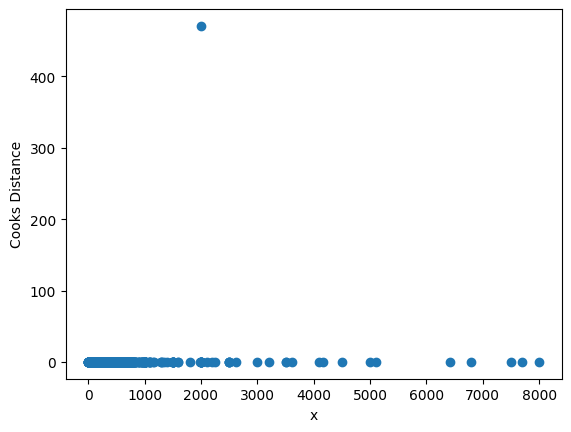

In [130]:
plt.scatter(numeric_df.price, cooks_distance[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()

In [131]:
np.where(cooks_distance[0]>100)

(array([10077]),)

In [132]:
numeric_df.iloc[10077]

host_id                9.295237e+06
neighbourhood_group    3.000000e+00
price                  2.000000e+03
minimum_nights         3.650000e+02
availability_365       0.000000e+00
log_price              7.600952e+00
license                1.000000e+00
price_minimum_stay     7.300000e+05
Name: 10077, dtype: float64

In [133]:
numeric_df.reset_index(drop=True, inplace=True)
numeric_df.drop([10077], axis=0, inplace=True)

In [134]:
binary_cols = numeric_df[(numeric_df == 0)|(numeric_df == 1)].dropna(axis=1).columns
df_numerical = numeric_df.drop(binary_cols, axis=1)

In [135]:
def winsorize_columns(column, lower, upper):
    q1 = column.quantile(lower)
    q3 = column.quantile(upper)
    iqr_value = q3-q1
    lower_bound = q1 - 1.5 * iqr_value
    upper_bound = q3 + 1.5 * iqr_value
    column = column.clip(lower=lower_bound, upper=upper_bound)
    return column

for column in df_numerical.columns:
    df_numerical[column] = winsorize_columns(df_numerical[column], 0.25, 0.75)

In [136]:
df_numerical.apply(lambda x: x.skew())


host_id                0.686266
neighbourhood_group   -0.104817
price                  1.116820
minimum_nights         1.414917
availability_365      -0.179151
log_price              0.459622
price_minimum_stay     1.171912
dtype: float64

In [137]:
df_new2 = pd.concat([df_numerical, numeric_df[binary_cols]], axis=1)
df_new2

host_id  neighbourhood_group  price  minimum_nights  \
0          22486                    0     80               1   
1          22486                    0    110               2   
2          32294                    2     50               3   
3           9744                    0     89               4   
4           7549                    2     40               1   
...          ...                  ...    ...             ...   
11433  208514239                    0    170               1   
11434  107716952                    3     65               1   
11435    8232441                    0     70               2   
11436    6570630                    0     40               4   
11437   30985759                    2     55               1   

       availability_365  log_price  price_minimum_stay  license  
0                   364   4.383276                  80        0  
1                   304   4.701389                 220        0  
2                   359   3.914021                 150        0  
3                   340   4.489759                 356        0  
4                   188   3.691376                  40        0  
...                 ...        ...                 ...      ...  
11433               365   5.136386                 170        0  
11434               163   4.175925                  65        0  
11435                 9   4.249923                 140        0  
11436                36   3.691376                 160        0  
11437                 2   4.009150                  55        0  

[11437 rows x 8 columns]

In [138]:
df_new2['license'].value_counts()

license
0    8443
1    2994
Name: count, dtype: int64

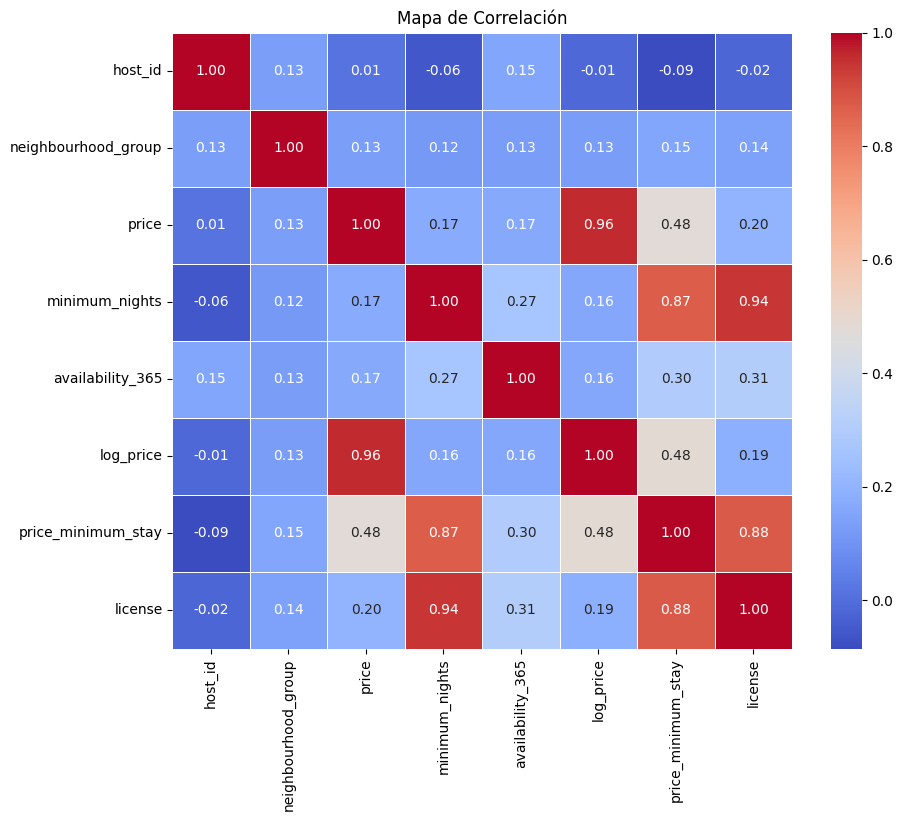

In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'df' con tus datos

# Calcula la matriz de correlación
correlation_matrix = df_new2.corr()

# Crea el mapa de correlación utilizando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Correlación')
plt.show()

In [140]:
corr = df_new2.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=3)
#me da a entender que la variable license tiene una correlacion basicamente perfecta con el minimo de noches. Es decir, que es altamente probable que los anuncios que ofrecen minimo de estadia de al menos 28 noches, no cuente con licensia turistica.

In [141]:
corr[corr.log_price.abs()>0.5].index

Index(['price', 'log_price'], dtype='object')

In [142]:
corr.log_price

host_id               -0.014977
neighbourhood_group    0.130722
price                  0.960189
minimum_nights         0.157968
availability_365       0.157541
log_price              1.000000
price_minimum_stay     0.484067
license                0.185400
Name: log_price, dtype: float64

In [143]:
corr.price_minimum_stay

host_id               -0.085461
neighbourhood_group    0.154260
price                  0.475187
minimum_nights         0.869734
availability_365       0.299255
log_price              0.484067
price_minimum_stay     1.000000
license                0.876099
Name: price_minimum_stay, dtype: float64

In [144]:
vif = pd.Series([variance_inflation_factor(corr.values, i) for i in range(corr.shape[1])], index=df_new2.columns)
vif #la variables  tiene una multicolinealidad bastante alta con otras variables, se busca reducirla.

host_id                  1.869177
neighbourhood_group      1.334588
price                  760.412030
minimum_nights         520.937372
availability_365         2.160800
log_price              909.932668
price_minimum_stay     474.790678
license                515.288744
dtype: float64

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [146]:
import xgboost as xgb
model = xgb.XGBRegressor(objective='reg:squarederror')

# Entrena el modelo en los datos de entrenamiento
model.fit(X_train, y_train)

# Calcula la importancia de las características
feature_importances = model.feature_importances_

# Asocia las importancias con los nombres de las características
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Ordena las características por importancia (de mayor a menor)
sorted_feature_importance = dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True))

# Imprime la importancia de las características (número adimensional, las características se comparan entre sí en términos de su contribución relativa a la predicción)
for feature, importance in sorted_feature_importance.items():
    print(f'Feature: {feature}, Importance: {importance*100}')

Feature: price_minimum_stay, Importance: 57.216060161590576
Feature: minimum_nights, Importance: 41.7382150888443
Feature: host_id, Importance: 0.6727459840476513
Feature: availability_365, Importance: 0.3394108498468995
Feature: neighbourhood_group, Importance: 0.03356805245857686
Feature: const, Importance: 0.0
Feature: license, Importance: 0.0


In [147]:
def get_vars_to_delete(d_imp, corr, imp_cut=0.005, corr_cut=0.1):
  ls_vars_low_corr = corr[corr.license.abs()<=corr_cut].index
  return [var for var in ls_vars_low_corr if d_imp[var]<=imp_cut]

In [148]:
vars_to_drop = get_vars_to_delete(sorted_feature_importance, corr, imp_cut=0.01, corr_cut=0.15)
vars_to_drop 

['host_id', 'neighbourhood_group']

In [149]:
df_new2.drop(vars_to_drop, axis=1, inplace=True)
df_new2

price  minimum_nights  availability_365  log_price  price_minimum_stay  \
0         80               1               364   4.383276                  80   
1        110               2               304   4.701389                 220   
2         50               3               359   3.914021                 150   
3         89               4               340   4.489759                 356   
4         40               1               188   3.691376                  40   
...      ...             ...               ...        ...                 ...   
11433    170               1               365   5.136386                 170   
11434     65               1               163   4.175925                  65   
11435     70               2                 9   4.249923                 140   
11436     40               4                36   3.691376                 160   
11437     55               1                 2   4.009150                  55   

       license  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
11433        0  
11434        0  
11435        0  
11436        0  
11437        0  

[11437 rows x 6 columns]

In [150]:
X = df_new2.drop(['log_price'], axis=1)
y = df_new2['log_price'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [151]:
binary_cols = X_train[(X_train==0)|(X_train==1)].dropna(axis=1).columns
X_train_num = X_train.drop(binary_cols, axis=1)
X_test_num = X_test.drop(binary_cols, axis=1)

In [152]:
from sklearn.preprocessing import MinMaxScaler #esto me ayuda a transformar los datos a una distribucion normal
scaler = MinMaxScaler().fit(X_train_num)

In [153]:
X_train_num_sc = scaler.transform(X_train_num)
X_test_num_sc = scaler.transform(X_test_num)

In [154]:
type(X_test_num_sc)

numpy.ndarray

In [155]:
X_test_num_sc.shape

(2288, 4)

In [156]:
print(np.min(X_train_num_sc, axis=1), np.max(X_train_num_sc, axis=1))

[0.         0.41428571 0.04285714 ... 0.         0.         0.        ] [0.14326648 1.         0.51780822 ... 0.40114613 0.62739726 0.26849315]


In [157]:
X_train_sc = pd.concat([pd.DataFrame(X_train_num_sc, columns = X_train_num.columns), X_train[binary_cols].reset_index(drop=True)], axis=1)
X_test_sc = pd.concat([pd.DataFrame(X_test_num_sc, columns = X_test_num.columns), X_test[binary_cols].reset_index(drop=True)], axis=1)

In [158]:
X_train_sc

price  minimum_nights  availability_365  price_minimum_stay  license
0     0.143266        0.057143          0.000000            0.071225        0
1     0.796562        0.414286          0.515068            1.000000        1
2     0.200573        0.042857          0.517808            0.079772        0
3     0.143266        0.414286          0.989041            0.427350        1
4     1.000000        0.028571          1.000000            0.511966        0
...        ...             ...               ...                 ...      ...
9144  0.100287        0.000000          1.000000            0.009972        0
9145  0.226361        0.000000          0.057534            0.022507        0
9146  0.401146        0.000000          0.010959            0.039886        0
9147  0.257880        0.000000          0.627397            0.025641        0
9148  0.186246        0.000000          0.268493            0.018519        0

[9149 rows x 5 columns]

In [162]:
df_new2.dtypes

price                   int64
minimum_nights          int64
availability_365        int64
log_price             float64
price_minimum_stay      int64
license                 int64
dtype: object

In [167]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV

model = lgb.LGBMRegressor()

param_dict = {'boosting_type': ['gbdt','dart','rf'],
              'num_leaves': np.arange(20, 250, 30),
              'max_depth':np.arange(20, 250, 30),
              'learning_rate':np.logspace(-3,0,5)}

random_search = RandomizedSearchCV(model, param_distributions=param_dict, n_iter=50, cv=5, random_state=42, n_jobs=-1, scoring='neg_root_mean_squared_error', verbose=1)
random_search.fit(X_train_sc, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000525 seconds.
You can set `force_col_wise=true` to remove the overhead.

[LightGBM] [Info] Total Bins 731
[LightGBM] [Info] Total Bins 731
[LightGBM] [Info] Number of data points in the train set: 7319, number of used features: 5
[LightGBM] [Info] Start training from score 4.650795[LightGBM] [Info] Number of data points in the train set: 7319, number of used features: 5

[LightGBM] [Info] Start training from score 4.647520
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000488 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 730
[LightGBM] [Info] Number of data points in the train set: 7319,

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000511 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 731
[LightGBM] [Info] Number of data points in the train set: 7319, number of used features: 5
[LightGBM] [Info] Start training from score 4.647520
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000490 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 731
[LightGBM] [Info] Number of data points in the train set: 7319, number of used features: 5
[LightGBM] [Info] Start training from score 4.650795
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000495 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 731
[LightGBM] [Info] Number of data points in the train set: 7319, number of used features: 5
[LightGBM] [Info] Start training from score 4.647520
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000511 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 731
[LightGBM] [Info] Number of data points in the train set: 7319, number of used features: 5
[LightGBM] [Info] Start training from score 4.650795
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000528 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 730
[LightGBM] [Info] Number of data points in the train set: 7319, number of used features: 5
[LightGBM] [Info] Start training fro

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000500 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 731
[LightGBM] [Info] Number of data points in the train set: 7319, number of used features: 5
[LightGBM] [Info] Start training from score 4.647520
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 731
[LightGBM] [Info] Number of data points in the train set: 7319, number of used features: 5
[LightGBM] [Info] Start training from score 4.650795
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000485 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 730
[LightGBM] [Info] Number of data points in the train set: 7319,

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000504 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 735
[LightGBM] [Info] Number of data points in the train set: 7320, number of used features: 5
[LightGBM] [Info] Start training from score 4.645164
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000542 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 731
[LightGBM] [Info] Number of data points in the train set: 7319, number of used features: 5
[LightGBM] [Info] Start training from score 4.647520
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000510 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 7319, number of used features: 5
[LightGBM] [Info] Start training fro

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000533 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 731
[LightGBM] [Info] Number of data points in the train set: 7319, number of used features: 5
[LightGBM] [Info] Start training from score 4.647520
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000507 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 731
[LightGBM] [Info] Number of data points in the train set: 7319, number of used features: 5
[LightGBM] [Info] Start training from score 4.647520
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002601 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 731
[LightGBM] [Info] Number of data points in the train set: 7319, number of used features: 5
[LightGBM] [Info] Start training from score 4.650795
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000503 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 731
[LightGBM] [Info] Number of data points in the train set: 7319, number of used features: 5
[LightGBM] [Info] Start training fro

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000588 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 731
[LightGBM] [Info] Number of data points in the train set: 7319, number of used features: 5
[LightGBM] [Info] Start training from score 4.647520
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000829 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 731
[LightGBM] [Info] Number of data points in the train set: 7319, number of used features: 5
[LightGBM] [Info] Start training from score 4.650795
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000527 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 730
[LightGBM] [Info] Number of data points in the train set: 7319, number of used features: 5
[LightGBM] [Info] Start training fro

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000488 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 731
[LightGBM] [Info] Number of data points in the train set: 7319, number of used features: 5
[LightGBM] [Info] Start training from score 4.647520
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000486 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 731
[LightGBM] [Info] Number of data points in the train set: 7319, number of used features: 5
[LightGBM] [Info] Start training from score 4.650795
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000509 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 730
[LightGBM] [Info] Number of data points in the train set: 7319, number of used features: 5
[LightGBM] [Info] Start training fro

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000509 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 731
[LightGBM] [Info] Number of data points in the train set: 7319, number of used features: 5
[LightGBM] [Info] Start training from score 4.647520
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000500 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 730
[LightGBM] [Info] Number of data points in the train set: 7319, number of used features: 5
[LightGBM] [Info] Start training from score 4.647063
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000560 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 7319, number of used features: 5
[LightGBM] [Info] Start training fro

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000450 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 731
[LightGBM] [Info] Number of data points in the train set: 7319, number of used features: 5
[LightGBM] [Info] Start training from score 4.650795


[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000488 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 730
[LightGBM] [Info] Number of data points in the train set: 7319, number of used features: 5
[LightGBM] [Info] Start training from score 4.647063
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000474 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 735
[LightGBM] [Info] Number of data points in the train set: 7320, number of used features: 5
[LightGBM] [Info] Start training from score 4.645164
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 7319, number of used features: 5
[LightGBM] [Info] Start training fro

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000541 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 736
[LightGBM] [Info] Number of data points in the train set: 9149, number of used features: 5
[LightGBM] [Info] Start training from score 4.647898


RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_iter=50, n_jobs=-1,
                   param_distributions={'boosting_type': ['gbdt', 'dart', 'rf'],
                                        'learning_rate': array([0.001     , 0.00562341, 0.03162278, 0.17782794, 1.        ]),
                                        'max_depth': array([ 20,  50,  80, 110, 140, 170, 200, 230]),
                                        'num_leaves': array([ 20,  50,  80, 110, 140, 170, 200, 230])},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=1)

In [168]:
# Mostramos los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

# Mostramos el rendimiento del mejor modelo
print("Mejor puntuación (RMSE) en el conjunto de prueba:")
print(-1*random_search.best_score_)

Mejores hiperparámetros encontrados:
{'num_leaves': 80, 'max_depth': 110, 'learning_rate': 0.1778279410038923, 'boosting_type': 'gbdt'}
Mejor puntuación (RMSE) en el conjunto de prueba:
0.04330011031752912


In [171]:
from skopt import BayesSearchCV

model = lgb.LGBMRegressor()

param_dict = {'boosting_type': ['gbdt'],
              'num_leaves': np.arange(65, 120, 10),
              'max_depth':np.arange(90, 130, 10),
              'learning_rate':[0.13,0.15,0.17,0.2]}

# Inicializa el objeto BayesSearchCV
opt = BayesSearchCV(
    model,
    param_dict,
    n_iter=50,  # Número de iteraciones de la búsqueda
    cv=5,       # Número de divisiones en validación cruzada
    n_jobs=-1,
    random_state=42,
    scoring='neg_root_mean_squared_error',  # Métrica a optimizar
    verbose=2
)

# Realiza la búsqueda bayesiana
opt.fit(X_train_sc, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000546 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 731
[LightGBM] [Info] Number of data points in the train set: 7319, number of used features: 5
[LightGBM] [Info] Start training from score 4.647520
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000512 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 731
[LightGBM] [Info] Number of data points in the train set: 7319, number of used features: 5
[LightGBM] [Info] Start training from score 4.650795
[CV] END boosting_type=gbdt, learning_rate=0.17, max_depth=120, num_leaves=75; total time=   0.6s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000478 seconds.
You can set `force_col_wise=true` to remove the overhead.
[Li

BayesSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1, random_state=42,
              scoring='neg_root_mean_squared_error',
              search_spaces={'boosting_type': ['gbdt'],
                             'learning_rate': [0.13, 0.15, 0.17, 0.2],
                             'max_depth': array([ 90, 100, 110, 120]),
                             'num_leaves': array([ 65,  75,  85,  95, 105, 115])},
              verbose=2)

In [172]:
# Imprime los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(opt.best_params_)

# Mostramos el rendimiento del mejor modelo
print("Mejor puntuación (RMSE) en el conjunto de prueba:")
print(-1*opt.best_score_)

Mejores hiperparámetros encontrados:
OrderedDict([('boosting_type', 'gbdt'), ('learning_rate', 0.2), ('max_depth', 90), ('num_leaves', 85)])
Mejor puntuación (RMSE) en el conjunto de prueba:
0.043110533217723


In [173]:
modelo = opt.best_estimator_

In [174]:
y_pred_train = np.exp(modelo.predict(X_train_sc))
y_pred_test = np.exp(modelo.predict(X_test_sc))

In [175]:
y_train_euros = np.exp(y_train)
y_test_euros = np.exp(y_test)

In [176]:
min(y_train_euros)

11.588827090398743

In [180]:
from sklearn.metrics import *


print(mean_absolute_error(y_train_euros,y_pred_train))
print(mean_absolute_error(y_test_euros,y_pred_test))

2.131502739699201
3.059698720073855


In [181]:
print(r2_score(y_train_euros,y_pred_train))
print(r2_score(y_test_euros,y_pred_test))

0.9832058317363122
0.9757999749785867


In [182]:
print(mean_absolute_percentage_error(y_train_euros,y_pred_train)*100)
print(mean_absolute_percentage_error(y_test_euros,y_pred_test)*100)

0.5138395003072894
0.8210383146729842
